In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/sit-2021-int214/021-Worldwide-Blockbusters-2019-1977/main/blockbusters_clean.csv",
    encoding="cp1252",
)

In [5]:
df.head()

,Unnamed: 0,release_year,rank_in_year,imdb_rating,mpaa_rating,film_title,film_budget,length_in_min,domestic_distributor,worldwide_gross,domestic_gross,genre_1,genre_2,genre_3,film_profit
0,1,2019,1,8.5,PG-13,Avengers: Endgame,356000000.0,181,Walt Disney,2.797801e+09,858373000.0,Action,Adventure,Drama,2.441801e+09
1,2,2019,2,7.0,PG,The Lion King,260000000.0,118,Walt Disney,1.656943e+09,543638043.0,Animation,Adventure,Drama,1.396943e+09
2,3,2019,3,7.2,PG,Frozen II,150000000.0,103,Walt Disney,1.420560e+09,470089732.0,Animation,Adventure,Comedy,1.270560e+09
3,4,2019,4,7.6,PG-13,Spider-Man: Far from Home,160000000.0,129,Sony Pictures,1.131928e+09,390532085.0,Action,Adventure,Sci-Fi,9.719280e+08
4,5,2019,5,6.9,PG-13,Captain Marvel,175000000.0,123,Walt Disney,1.128275e+09,426829839.0,Action,Adventure,Sci-Fi,9.532748e+08


array([[<Axes: title={'center': 'imdb_rating'}>]], dtype=object)

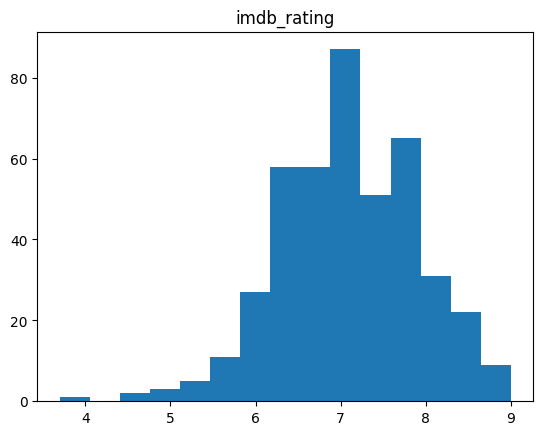

In [11]:
df.hist("imdb_rating", bins=15, grid=False)

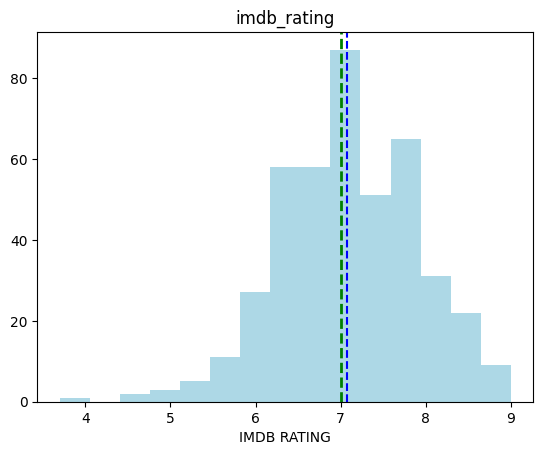

In [21]:
histplot = df.hist("imdb_rating", bins=15, grid=False, color="lightblue")
plt.axvline(df.imdb_rating.mean(), color="b", ls="--")
plt.axvline(df.imdb_rating.median(), color="g", ls="--", lw=2)
plt.xlabel("IMDB RATING")

Text(0, 0.5, 'Worldwide Gross')

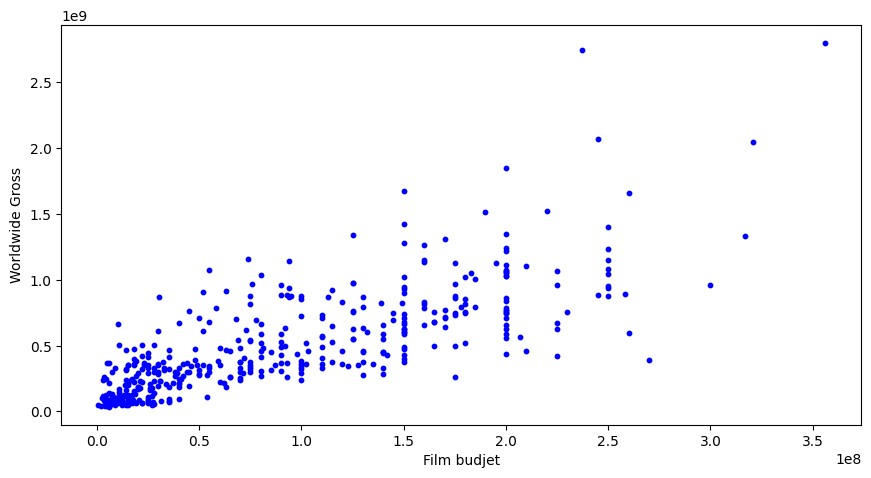

In [26]:
fig = plt.figure(figsize=(8, 4))
axes = fig.add_axes([0, 0, 1, 1])
axes.scatter(
    x=df["film_budget"],
    y=df["worldwide_gross"],
    s=10,
    marker="o",
    c="blue",
)
plt.xlabel("Film budjet")
plt.ylabel("Worldwide Gross")

Text(62.722222222222214, 0.5, 'Worldwide Gross')

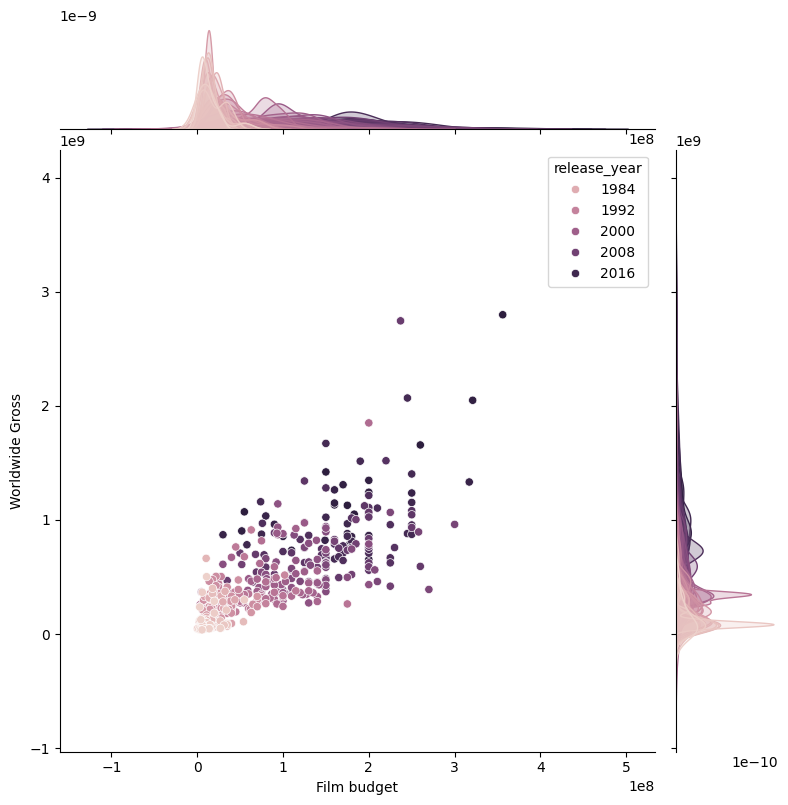

In [35]:
joinplot = sns.jointplot(
    data=df,
    x="film_budget",
    y="worldwide_gross",
    hue="release_year",
    height=8,
)
plt.xlabel("Film budget")
plt.ylabel("Worldwide Gross")

Text(62.722222222222214, 0.5, 'Worldwide Gross')

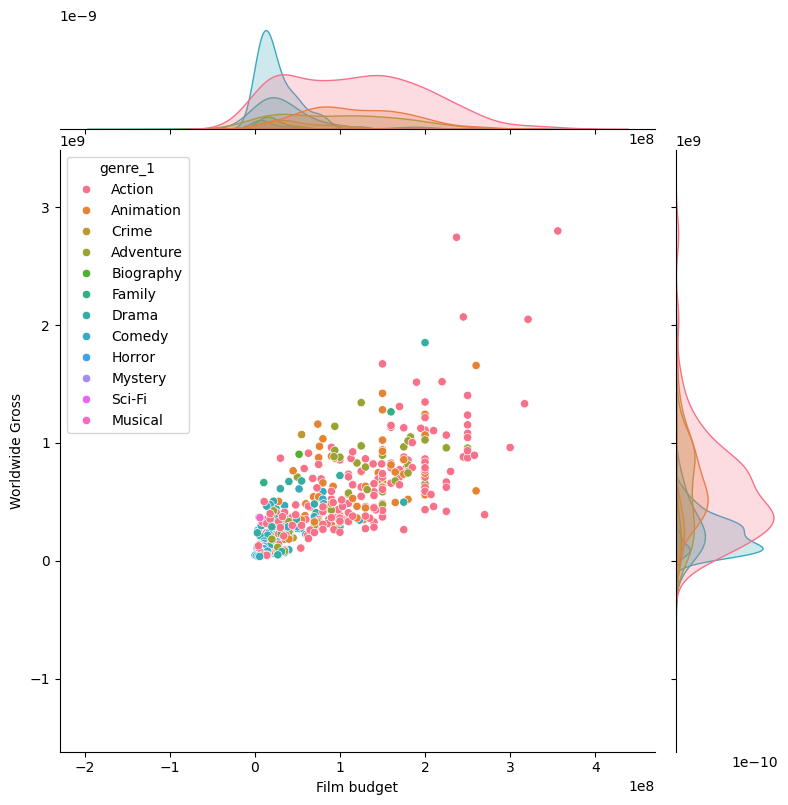

In [43]:
ax2 = fig.add_subplot(122)
joinplot = sns.jointplot(
    data=df,
    x="film_budget",
    y="worldwide_gross",
    hue="genre_1",
    height=8,
)
plt.xlabel("Film budget")
plt.ylabel("Worldwide Gross")

In [ ]:
joinplot = sns.jointplot(
    data=df,
    x="film_budget",
    y="worldwide_gross",
    hue="genre_1",
    height=8,
)
plt.xlabel("Film budget")
plt.ylabel("Worldwide Gross")

In [45]:
df["mpaa_rating"].value_counts()

mpaa_rating
PG-13    178
PG       133
R         95
G         23
Name: count, dtype: int64

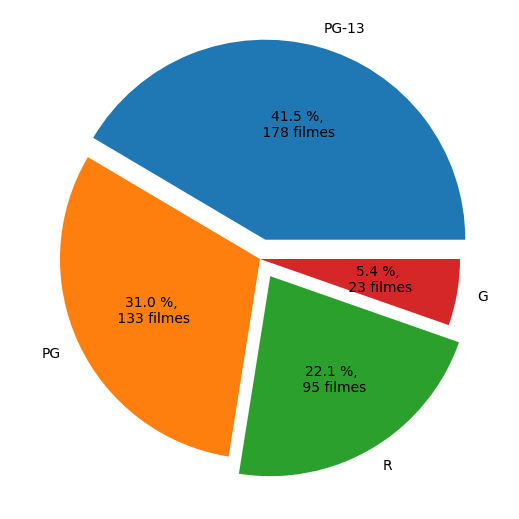

In [61]:
ratings = df["mpaa_rating"].value_counts()

all_count = df["mpaa_rating"].count()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    ratings,
    labels=ratings.index,
    autopct=lambda pct: f"{round(pct,1)} %,\n {round(pct/100*all_count)} filmes",
    explode=[0.1, 0, 0.1, 0],
)

### Module 2. HW №1

Построение круговой диаграммы 

Выполните построение круговой диаграммы по данным файла Electric_Сars.csv, содержащим сведения о моделях электромобилей.

Для построения диаграммы:

1.	Сформируйте данные по количеству моделей (столбец Brand) и выполните их сортировку по столбцу TopSpeed_KmH.

2.	Используйте библиотеку matplotlib, чтобы построить круговую диаграмму по полученным в первом пункте данным. Диаграмма должна показывать долю в процентном отношении первых 5 и всех остальных моделей (rest). 

3.	Покажите на диаграмме наименование брендов и соответствующую им долю в процентах.

4.	Увеличьте радиус диаграммы в 3 раза.

5.	Сохраните график под именем auto_pie.png.

In [2]:
import pandas as pd

df = pd.read_csv("./data/Electric_Car.csv")

In [39]:
df.sample(5)

,Brand,Model,AccelSec,TopSpeed_KmH,Range_Km,Efficiency_WhKm,FastCharge_KmH,RapidCharge,PowerTrain,PlugType,BodyStyle,Segment,Seats,PriceEuro
11,Nissan,Leaf,7.9,144,220,164,230,Yes,FWD,Type 2 CHAdeMO,Hatchback,C,5,29234
98,Nissan,Ariya 63kWh,7.5,160,330,191,440,Yes,FWD,Type 2 CCS,Hatchback,C,5,45000
26,Volkswagen,ID.3 Pro,9.0,160,350,166,490,Yes,RWD,Type 2 CCS,Hatchback,C,5,33000
73,Byton,M-Byte 95 kWh 4WD,5.5,190,390,244,460,Yes,AWD,Type 2 CCS,SUV,E,5,64000
44,SEAT,Mii Electric,12.3,130,195,166,170,Yes,FWD,Type 2 CCS,Hatchback,A,4,20129


In [75]:
grouped_df = (
    df.groupby("Brand")
    .size()
    .sort_values(ascending=False)
    .reset_index()
    .rename(columns={0: "Count"})
)
grouped_df.loc[5] = ["Rest", grouped_df.loc[5:, "Count"].sum()]
grouped_df = grouped_df[:6]
grouped_df

,Brand,Count
0,Tesla,13
1,Audi,9
2,Nissan,8
3,Volkswagen,8
4,Skoda,6
5,Rest,59


In [67]:
import matplotlib.pyplot as plt

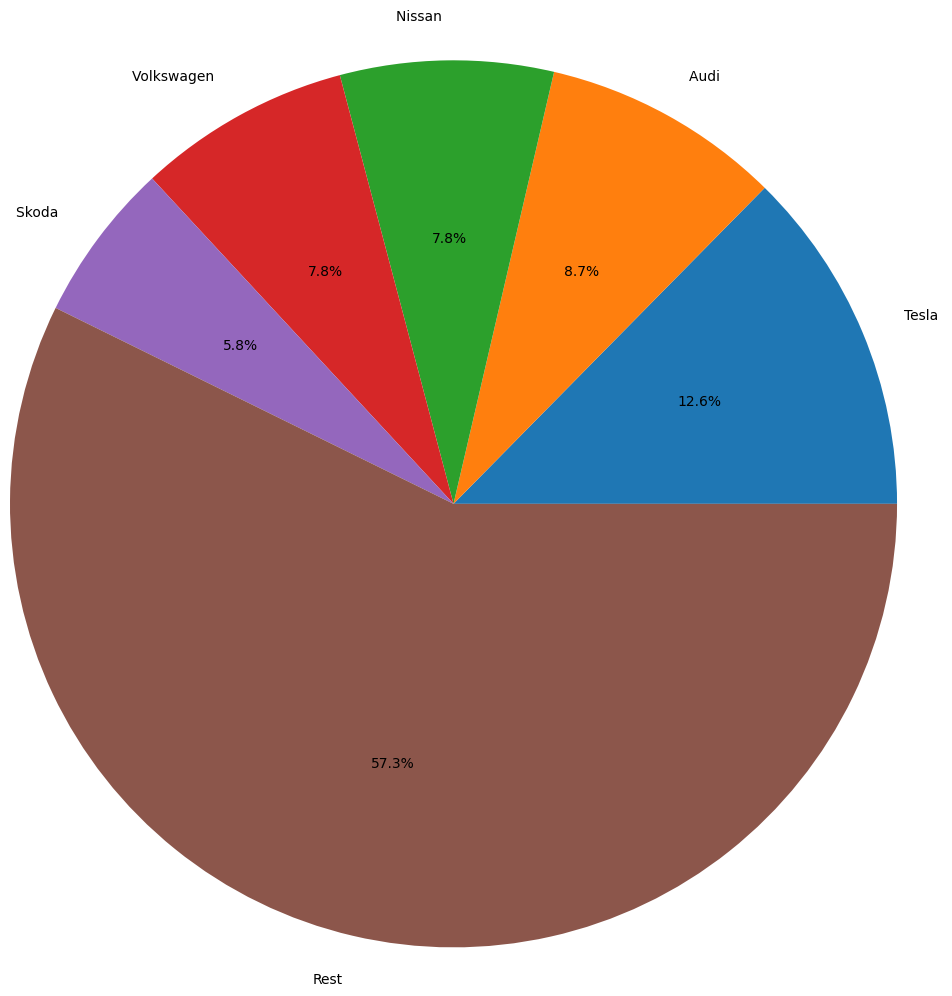

In [82]:
fig, ax = plt.subplots()
plt.pie(grouped_df["Count"], labels=grouped_df["Brand"], autopct="%.1f%%", radius=3)
plt.savefig("auto_pie.png", bbox_inches="tight", dpi=100)
plt.show()

### Module 2. HW №2

Построение столбчатой диаграммы

Постройте горизонтальную столбчатую диаграмму по данным файла Electric_Сars.csv, который содержит сведения о моделях электромобилей.

Для построения диаграммы:

1.	Сформируйте данные по количеству различных моделей (столбец Brand) и выполните сортировку по количеству.

2.	Используйте библиотеку matplotlib, чтобы построить горизонтальную столбчатую диаграмму по данным из первого пункта.

3.	При построении диаграммы укажите наименование модели и соответствующее ей количество.

4.	Сохраните график под именем saved_figure_barh.png.

Как должно получиться:<br>
<img src='../static/img/data_visual_24.png'>